In [1]:
import torch 
import numpy as np

In [2]:
d, k = 10, 10

W_rank=2
W = torch.randn(d,W_rank) @ torch.randn(W_rank,k)
print(W)

tensor([[ 0.1498, -0.3525, -0.1976, -2.7361,  1.1108,  2.5577,  0.3749,  1.0073,
          1.4649,  1.2249],
        [ 1.5055,  0.1112, -1.5415, -8.2729,  3.7115,  7.8835,  1.3334,  1.4475,
          4.8304,  5.0284],
        [ 0.7164,  1.1387, -0.6015,  1.7756, -0.4481, -1.5439, -0.0888, -1.8892,
         -0.6405,  0.2293],
        [-2.0751, -2.5489,  1.8335, -1.2003, -0.2303,  0.8170, -0.2420,  3.6929,
         -0.1735, -2.1575],
        [-3.5030, -3.8495,  3.1502,  0.3588, -1.3133, -0.8318, -0.7105,  5.1576,
         -1.5199, -4.5454],
        [ 0.5220,  0.9307, -0.4260,  1.8248, -0.5324, -1.6172, -0.1320, -1.6163,
         -0.7399, -0.0340],
        [ 0.3281, -0.0762, -0.3481, -2.3311,  1.0136,  2.2076,  0.3575,  0.5538,
          1.3244,  1.2958],
        [-0.1212, -0.5496,  0.0583, -2.1786,  0.8039,  2.0023,  0.2529,  1.1673,
          1.0747,  0.6726],
        [-1.7639, -2.6123,  1.5043, -3.3650,  0.7131,  2.8680,  0.0912,  4.1972,
          1.0589, -0.9459],
        [-1.3066, -

In [5]:
W_rank = np.linalg.matrix_rank(W)
print(f'rank of W: {W_rank}')

rank of W: 2


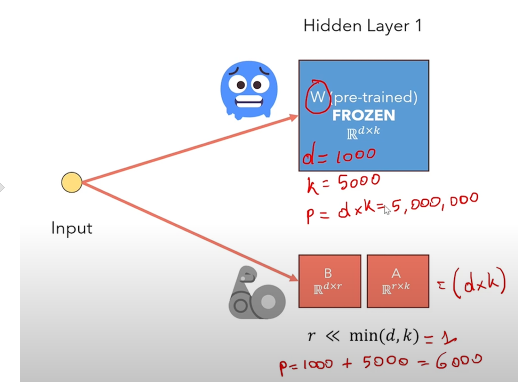

In [9]:
#SVD
#Perform SVD on W (W= U*S*V^T)
U, S, V = torch.svd(W)

# For rank-r factorization, keep only the first r singular values
U_r= U[:, :W_rank]
S_r= torch.diag(S[:W_rank])
V_r= V[:, :W_rank].t()

#Compute C = U_r*S_r  and R = V_r
B=U_r @ S_r
A=V_r

print(f'shape of B: {B.shape}')
print(f'shape of A: {A.shape}')

shape of B: torch.Size([10, 2])
shape of A: torch.Size([2, 10])


In [11]:
#Generate random bias and input
bias = torch.randn(d)
x= torch.randn(d)

#Compute y= Wx + b
y = W @ x + bias

#Compute y' = CRx + b
y_prime = (B @ A) @ x + bias

print(f'Original y using W: \n', y)
print('')
print(f"y' computed using BA: \n", y_prime)



Original y using W: 
 tensor([-2.7233, -8.5938, -0.6976,  5.4759,  9.9463,  0.2284, -1.9022, -1.0433,
         2.1888,  3.3250])

y' computed using BA: 
 tensor([-2.7233, -8.5938, -0.6976,  5.4759,  9.9462,  0.2284, -1.9022, -1.0433,
         2.1888,  3.3250])
